In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
# 1. Membaca dataset yang sudah digabungkan
merged_dataset = pd.read_csv('kumpulan-data/merged_dataset.csv')

In [3]:
# 2. Pra-pemrosesan Data
# Pilihan atribut penting
selected_columns = ['temp', 'humidity', 'wind_speed', 'price actual', 'total load actual']
data = merged_dataset[selected_columns].dropna()

In [4]:
# Rename target column for clarity
data = data.rename(columns={'total load actual': 'energy_load'})

In [5]:
# Normalisasi data
scaler = StandardScaler()

In [6]:
# Kategorisasi target (klasifikasi beban energi)
data['energy_load_category'] = pd.qcut(data['energy_load'], q=3, labels=["Low", "Medium", "High"])

data[['temp', 'humidity', 'wind_speed', 'price actual']] = scaler.fit_transform(
    data[['temp', 'humidity', 'wind_speed', 'price actual']]
)

In [7]:
# 3. Pembagian Data
X = data[['temp', 'humidity', 'wind_speed', 'price actual']]
y = data['energy_load_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# 4. Pelatihan Model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# 5. Evaluasi Model
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

        High       0.54      0.56      0.55      2342
         Low       0.58      0.63      0.61      2315
      Medium       0.43      0.38      0.41      2349

    accuracy                           0.52      7006
   macro avg       0.52      0.52      0.52      7006
weighted avg       0.52      0.52      0.52      7006

Accuracy: 0.5239794461889808


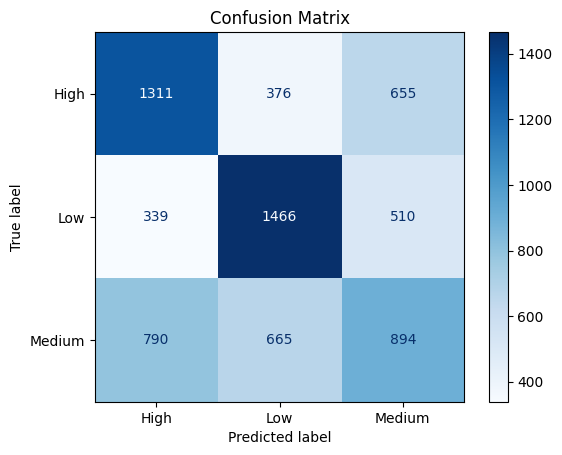

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

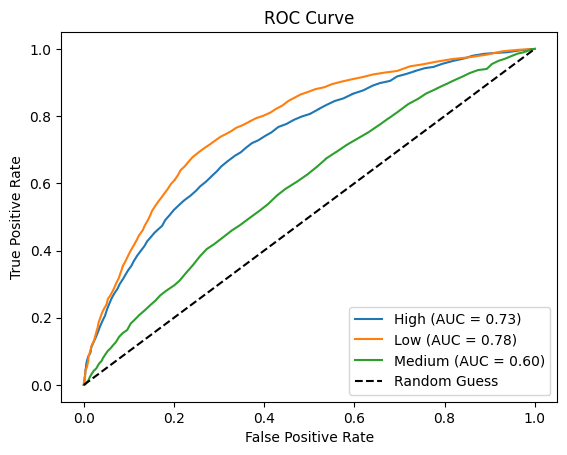

In [11]:
# ROC Curve untuk multiclass
y_test_bin = label_binarize(y_test, classes=clf.classes_)
y_score = clf.predict_proba(X_test)
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(clf.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i, label in enumerate(clf.classes_):
    plt.plot(fpr[i], tpr[i], label=f"{label} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

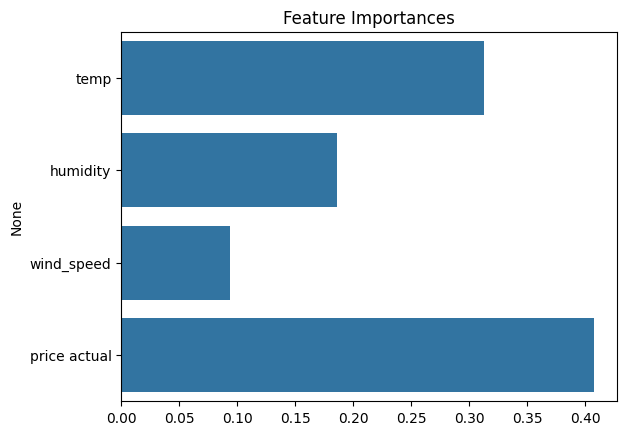

In [12]:
# 6. Visualisasi dan Interpretasi
# Feature importance
importance = clf.feature_importances_
feature_names = X.columns
sns.barplot(x=importance, y=feature_names)
plt.title('Feature Importances')
plt.show()

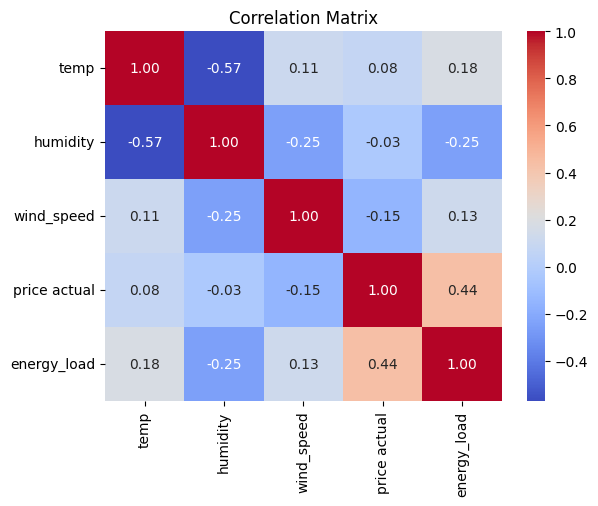

In [14]:
#  korelasi
numeric_columns = data.select_dtypes(include=[np.number]).columns
sns.heatmap(data[numeric_columns].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


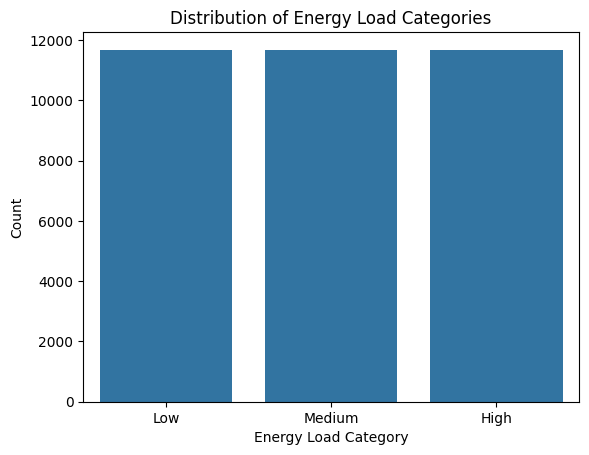

In [15]:
# Distribusi Kategori Beban Energi
sns.countplot(x='energy_load_category', data=data)
plt.title("Distribution of Energy Load Categories")
plt.xlabel("Energy Load Category")
plt.ylabel("Count")
plt.show()

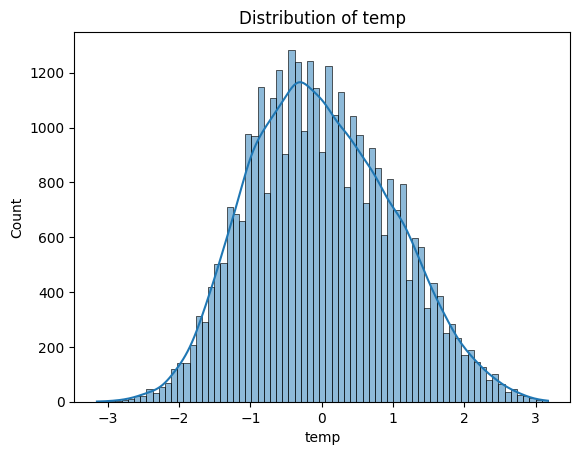

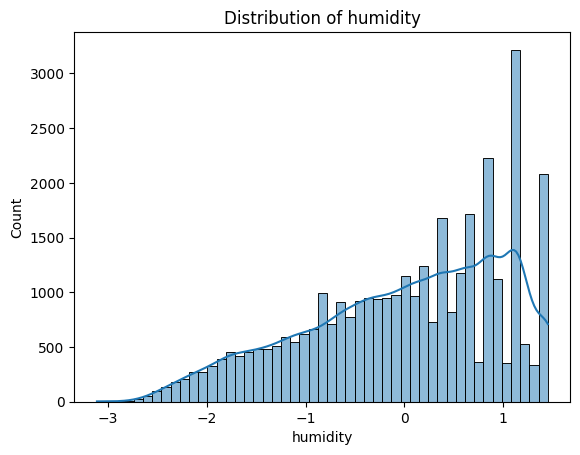

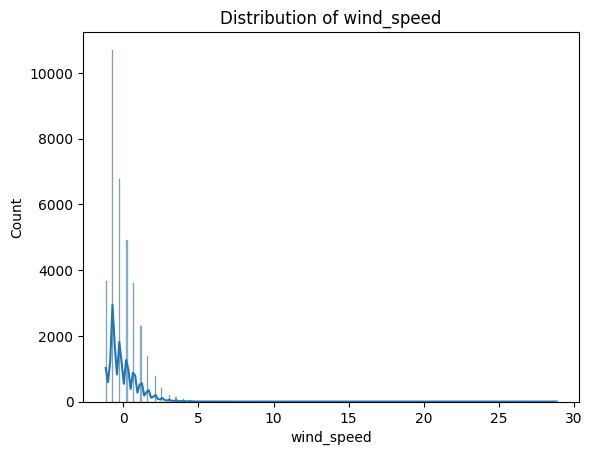

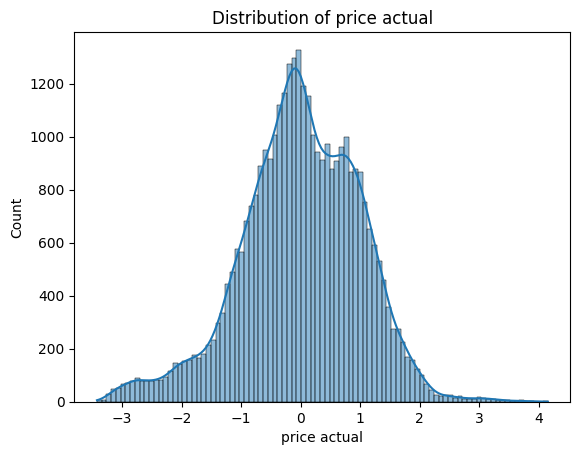

In [16]:
# Distribusi Variabel Penting
for col in ['temp', 'humidity', 'wind_speed', 'price actual']:
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [17]:
# Save model
joblib.dump(clf, 'random_forest_energy_model.pkl')
print("Model saved as 'random_forest_energy_model.pkl'")

Model saved as 'random_forest_energy_model.pkl'
